# **Bayesian Classification : Illustration**

## **Preliminary steps**

In [1]:
### PACKAGES

import matplotlib.pyplot as plt
import scienceplots

plt.style.use("science")


In [2]:
### FUNCTIONS AND CLASSES

from src.model.bayesian_classification import MLP, VariationalMLP

from src.libs.preprocessing_classif import get_data, get_dataloader

from src.libs.visualization import plot_decision_boundary


## **Data**

In [3]:
### GET DATA AND DATALOADER

X, y = get_data(nb_samples=1000, noise=0.1)

train_loader = get_dataloader(X=X, y=y)


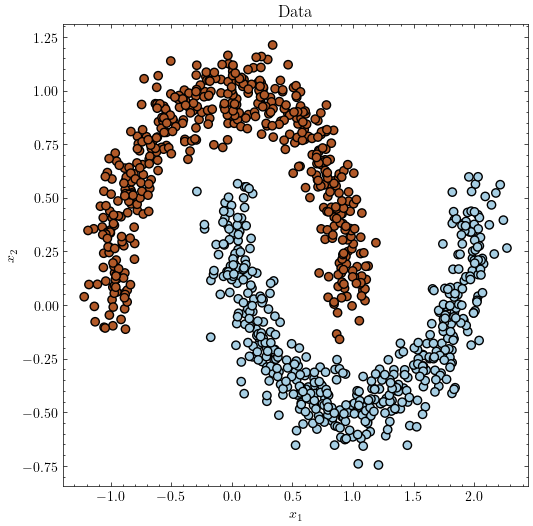

In [4]:
### VISUALIZE_DATA


plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Paired_r", edgecolors="k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Data")
plt.show()


## **Classic MLP model**

In [5]:
### DEFINE MODEL

mlp_model = MLP(
    input_dimension=2,
    hidden_dimension=10,
    output_dimension=1,
    dropout=False,
    dropout_rate=None,
)


In [6]:
### TRAIN MODEL

mlp_model.train_model(train_loader=train_loader, nb_epochs=100, lr=0.01)


Training completed after 100 epochs.


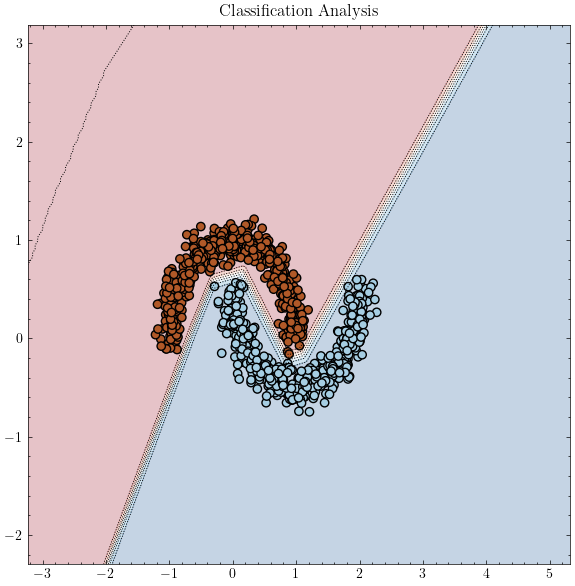

In [7]:
### VISUALIZE RESULTS

plot_decision_boundary(model=mlp_model, X=X, Y=y, model_type="classic")


## **Variational Inference model**

In [17]:
### DEFINE MODEL

vi_model = VariationalMLP(
    input_dimension=2, hidden_dimension=50, output_dimension=1, prior_var=10
)


In [18]:
### TRAIN MODEL

vi_model.train_model(train_loader=train_loader, nb_epochs=1000, lr=0.1)


Training completed after 1000 epochs.


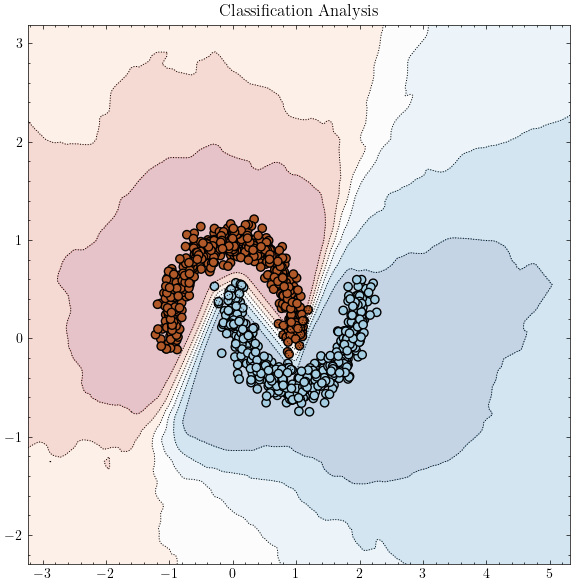

In [20]:
### VISUALIZE RESULTS

plot_decision_boundary(model=vi_model, X=X, Y=y, model_type="vi")


## **MC Dropout MLP model**

In [41]:
### DEFINE MODEL

mc_dropout_model = MLP(
    input_dimension=2,
    hidden_dimension=50,
    output_dimension=1,
    dropout=True,
    dropout_rate=0.5,
)


In [42]:
### TRAIN MODEL

mc_dropout_model.train_model(train_loader=train_loader, nb_epochs=100, lr=0.1)


Training completed after 100 epochs.


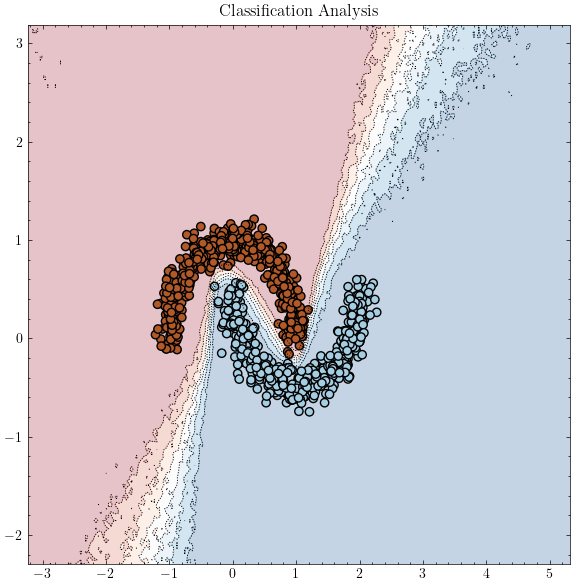

In [43]:
### VISUALIZE RESULTS

plot_decision_boundary(model=mc_dropout_model, X=X, Y=y, model_type="mc_dropout")
